# 0.  Set up



In [ ]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
# authorize access to google drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# navigate to gdrive home directory
%cd gdrive/MyDrive

# set paths
dir_data = 'projet_radio_covid/COVID-19_Radiography_Dataset/'

lst_group = ['covid', 'normal', 'viral', 'opac']
lst_folders = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']
mapper_fname = dict(zip(lst_group, lst_folders))

dirs = dict(zip(lst_group, [os.path.join(dir_data, folder) for folder in lst_folders]))
dir_images = dict(zip(lst_group, [os.path.join(dir, 'images') for dir in dirs.values()]))
dir_masks = dict(zip(lst_group, [os.path.join(dir, 'masks') for dir in dirs.values()]))

/content/gdrive/MyDrive


# 1.  Data quality

[EN] We used open source data collected by a team of researchers from Qatar University in Doha, Dhaka University in Bangladesh with their collaborators from Pakistan and Malaysia as well as doctors.

The database contains 22,165 X-ray images with their respective masks. The images are divided into 4 folders corresponding to the following lung pathologies: covid-19 ('covid'), viral pneumonia ('viral'), other lung pathologies ('opac'), no pathology ('normal'). 

[FR] Nous avons utilisé pour cette analyse, les données open source récoltées par une équipe de chercheurs de l'université du Qatar à Doha, l'université de Dhaka au Bengladesh avec leurs collaborateurs du Pakistan et de Malaisie ainsi que des médecins.

Cette base contient 22165 images de radiographies accompagnées de leurs masques respectifs. Les images sont réparties dans 4 dossiers correspondant 4 pathologies pulmonaires : 'Viral Pneumonia', 'Lung Opacity', 'Covid' et une catégorie témon 'Normal.


## Imbalanced data

In [ ]:
# Evaluating number of images per label folder
# Needed with following cell - overall data image number needed
effectifs =[]
for i in range(0,4):
  effectif = os.listdir(list(dir_images.values())[i])
  effectifs.append(len(effectif))


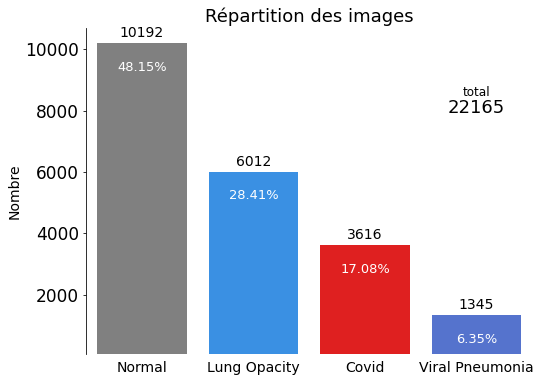

In [ ]:
# Plotting distribution
# Color Chart
# -----------
# Normal is          grey
# Lung Opacity is    dodgerblue
# Covid is           red
# Viral Pneumonia is royalblue

categories = ['Normal', 'Lung Opacity', 'Covid', 'Viral Pneumonia']
effectifs.sort(reverse=True)
colors = ['grey', 'dodgerblue','red', 'royalblue']
pos_x = [0, 1, 2, 3]

# Getting percetages right
percentage = []
for i in range(len(effectifs)):
  percentage.append((effectifs[i]/sum(effectifs))*100)


fig = plt.figure(figsize=(8,6))
fig.tight_layout(pad=5)

# Creating a case-specific function to avoid code repetition
def plot_vert_bar(subplot, y_min):
    ax = sns.barplot(x=categories, y=effectifs, palette=colors)
    plt.title("Répartition des images", fontsize=18)
    plt.xlabel(None)
    plt.xticks(pos_x, categories, fontsize=14)
    plt.ylabel('Nombre', fontsize=14)
    plt.yticks(fontsize=17)
    plt.ylim(y_min, None)
    sns.despine(bottom=True)
    patches = ax.patches
    for i in range(len(patches)):
      x = patches[i].get_x() + patches[i].get_width()/2
      y = patches[i].get_height()-900
      ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center',size = 13,color='white')
    ax.grid(False)
    ax.tick_params(bottom=False, left=True)
    return None

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+200, y[i], ha = 'center', fontsize = 14)
plt.text(3, 7800, "21165", fontsize = 18, horizontalalignment='center', verticalalignment='bottom')
plt.text(3, 8600, "total", fontsize=12, ha='center', va='center')

addlabels(categories, effectifs)
plot_vert_bar(1, y_min=80)
plt.show()

Conclusion: The label is highly imbalanced, with 48% of the data are of the most frequent label "Normal", while the least frequent label "Viral Pneuminia" counts for only 6% of all the data. 

## Qualitative Analysis

[EN] A primary visual analysis of the images has enable us to point out different features which variation might be due to the origin first glance, images are all different. These differences may be explained with the various origins of the images as related in the article hereafter ([Introductory Document to the dataset](https://drive.google.com/file/d/1-nW3E1k6tFPMizLZGy6_xQ1r6xgVCmgl/view?usp=share_link)). The type and condition of the X-Ray equipment, the experience and pratice of the radiologist teams, the patient conditions, the conditions in which the image has been operated may also influence the image appearance.  

We have identified five different "anomalies" which could hinder the categorization work. These are : **Images transformation**, **Lung Zone Crop**, **Image Brightness**, **Interferences**, and **Noise&Blur**.

In order to evaluate the incidence of such anomalies within the images groups, we have sampled a 10% of images per group and examined each of them, one by one.


[FR] Une première analyse visuelle des images nous a permis de constater certaines catactéristiques différentes et dont la variation peut s'expliquer notamment avec l'origine des images elles-mêmes comme expliqué dans l'article en annexe ([Introductory Document to the dataset](https://drive.google.com/file/d/1-nW3E1k6tFPMizLZGy6_xQ1r6xgVCmgl/view?usp=share_link)). Le type, l'état des équipements de radiologie, les pratiques et habitudes des équipes, l'état du patient au moment de l'examen ou les conditions de prise de vue peuvent également avoir une influence sur l'apparence de l'image.

Nous avons identifié cinq types d'"anomalies" qui pourraient gêner le travail de catégorisation : des problèmes de **transformation de l'image **(Image Transformation), de **cadrage de la zone pulmonaire** (Lung Zone Crop), de **luminosité** (image brightness), d'**interférences** (interferences) et de **bruit ou flou** (noise and blur). 

Pour quantifier l'incidence de ces anomalies dans les différents groupes d'images, nous avons prélevé un échantillon de 10 % par groupe et les avons examinés.

[EN] Please find the details of the analysis, including examples of the anormalie, in this supplementary notebook: 

[FR] Veuillez trouvez les détails d'analyse y compris exemples des anormalies dans le notebook supplémentaire: 

https://colab.research.google.com/drive/1FdIIkkEnVcq76GTntWEQoBdUiMZi4rgB#scrollTo=JMEw2j10ozYC

[EN] Result of the analysis: 

[FR] Resultat de l'analyse:

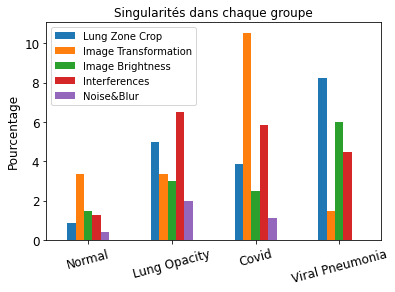

Conclusion:

[EN]
1.   Anomalies spread among different categories unevenly. We can’t foresee yet, what will their impact be on model training, but we keep in mind that this bias might be challenging.
2.   In order to save cpu time and memory for the following analysis, we will work on sample of images. However, since the percentage of anomalies are relatively high (~10% for image transformation for covid, ~8% lung zone crop for viral pneumonia), we will use a sample of 1000 images in each category so that the maximum anomalie will reach around 10% in each category. (1345 viral * 8% zone crop in viral / 1000 = 10.76%).
(1345 viral * 8% zone crop in viral / 1000 = 10.76%)
3.   The difference of brightness in each category suggests the potential of normalization of the image intensities during the preprocessing. 

[FR] 
1. Les anomalies sont présentes dans chaque groupe de façon hétérogène. Nous ne pouvons dire avec certitude quel sera leur impact sur le modèle d’apprentissage, mais nous gardon à l’esprit que ce biais pourrait être un obstacle.
2. Pour pouvoir économiser du temps et de la mémoire dans la conduite de cette analyse, nous travaillerons sur des échantillons des images et non sur leur totalité. Cependant, comme les pourcentages des anomalies sont relativement élevés (~10% pour image transformation dans le groupe covid, ~8% pour lung zone crop pour viral pneumonia), nous travaillerons sur des échantillons de 10000 pour chaque groupe ainsi le maximum pour un type d’anomalie devra être autour de 10%. (1345 trial *8% zone cross in viral /1000 = 10.76%).
3. La différence de luminosité dans chaque groupe suggère d’effectuer une normalisation de l’intensité des images lors du preprocessing.







# 2.  Validation of operations on the images

[EN] We suggest the possible operation on the images are resizing and application of the mask. We used one single image as exemple, using the intensity distribution and statistics to examine the effect of these operations. 

[FR] Nous pensons que les opérations à appliquer sur les images sont le redimensionnement et l'ajout du masque. Nous avons utilisé une seule image comme exemple pour analyser la distribution d'intensité pour examiner l'effet de ces opérations.

In [ ]:
# reading an image and a corresponding mask in group 'covid'
group = lst_group[0]
fname = lst_folders[0] + '-1.png'
image = imread(os.path.join(dir_images[group], fname))
mask = imread(os.path.join(dir_masks[group],fname),as_gray=True)

## Intensity distribution on single image

[EN] What can we study on an image ? 
An image is a 299 x 299 array. To each pixel p of coordinates (ip, jp) corresponds the light intensity I(ip, jp) taking integer values between 0 (black) and 255 (white). 
We will therefore study the statistics of the intensity I of an image.

[FR] Que pouvons-nous étudier sur une image ? 
Une image est un array 299 x 299. A chaque pixel p de coordonnées (ip, jp) correspond l'intensité lumineuse I(ip, jp) prenant des valeurs entières entre 0 (noir) et 255 (blanc). 
Nous allons donc étudier les statistiques de l’intensité I d'une image.

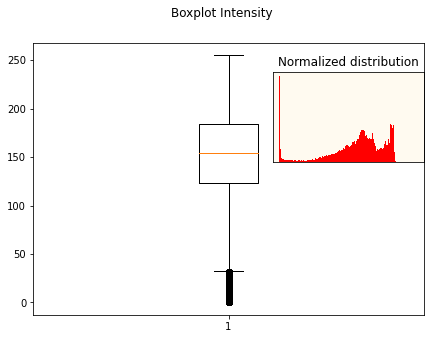

In [ ]:
fig = plt.figure( figsize=(7,5))
plt.boxplot(image.ravel());
plt.suptitle('Boxplot Intensity')

plt.axes([.6, 0.55, .3, .25], facecolor='#FFFAF0')
plt.hist(image.ravel(), bins = range(256), density=True, color='red', label='Normalized distribution')
plt.title('Normalized distribution');
plt.xticks([ ])
plt.yticks([ ]);
#plt.legend();

## normalized intensity distribution

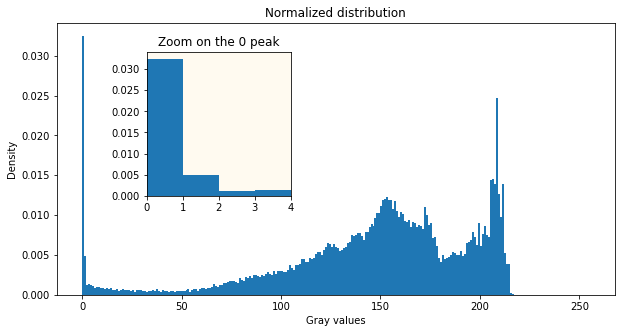

In [ ]:
fig=plt.figure( figsize= (10, 5) )
plt.hist(image.ravel(), bins = range(256), density=True);
plt.xlabel('Gray values')
plt.ylabel('Density')
#plt.title('Normalized distribution')
plt.gca().title.set_text('Normalized distribution')
plt.axes([.25, 0.4, .2, .4], facecolor='#FFFAF0');
plt.hist(image.ravel(), bins = range(256), density=True);
plt.xlim([0,4]);
plt.gca().title.set_text('Zoom on the 0 peak')

#plt.axes([.6, .5, .45, .35], facecolor='#FFFAF0');
#plt.hist(image.ravel(), bins = range(256), density=True);
#plt.xlim([1,255]);
#plt.ylim([0,0.02]);
#plt.gca().title.set_text('Density without 0 peak')
#plt.legend();
# a large peak on 0 (black) values of the background. The mean and median values are influenced by this peak.

[EN] A large peak is observed at the 0 (black) value, which corresponds to the dark background of the images.

[FR] Un pic important est observé sur la valeur 0 (noir), ce qui correspond au fond sombre des clichés.

## Effect of resizing 299 x 299 --> 256 x 256
[EN] Images have a size of 299 x 299 while masks have a size of 256 x 256. What is the effect of resizing images ?

[FR] Les images ont une taille de 299 x 299 alors que les masques ont une taille de 256 x 256. Quel est l'effet du redimentionnement d'une image ?


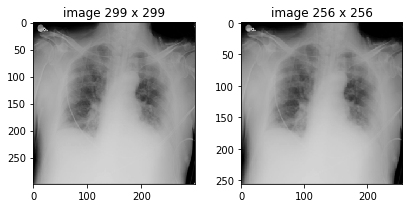

In [ ]:
image_resized = resize( image, (256, 256), anti_aliasing = True )

fig=plt.figure( figsize= (6, 3) )
plt.subplot(1,2,1)
imshow(image);
plt.gca().title.set_text('image 299 x 299')

plt.subplot(1,2,2)
imshow(image_resized);
plt.gca().title.set_text('image 256 x 256')

[EN] When resizing, the array values change from integer values in the range [0,255] to floating point values in the range [0,1]. The image quality remains good.

[FR] Lors du redimensionnement, les valeurs de l'array passent de valeurs entières dans l'intervalle [0,255] à des valeurs décimales dans l'intervalle [0,1]. L'image reste de bonne qualité.

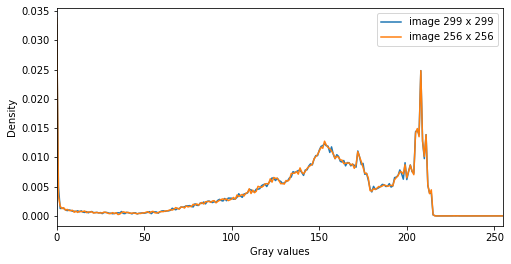

In [ ]:
# verification by intensity distribution 
fig=plt.figure( figsize= (8, 4) )
hist_r = np.histogram(image_resized, bins=256, range=(0,1), density=True)[0]/255
hist_im = np.histogram(image, bins=256, range=(0,255), density=True)[0]
plt.plot(hist_im, label='image 299 x 299');
plt.plot(hist_r, label='image 256 x 256');
plt.xlabel('Gray values')
plt.ylabel('Density')
plt.xlim([0,255]);
#plt.ylim([0,0.027]);
plt.legend();

In [ ]:
# verification by statistics
print('image \n q1:', round(np.quantile(image, .25),2), 'q2:',round(np.quantile(image, .5),2), 'q3:', round(np.quantile(image, .75),2), 'mean:', round(image.mean(),2), 'var:',round(image.var(),2), 'std :',round(image.std(),2), 'max :', image.max(),'min:', image.min() )
print('resized image \n q1:', round(np.quantile(image_resized, .25)*255,2), 'q2:', round(np.quantile(image_resized, .5)*255,2), 'q3:', round(np.quantile(image_resized, .75)*255,2), 'mean:', round(image_resized.mean()*255,2), 'var:', round(image_resized.var()*255,2), 'std :', round(image_resized.std()*255,2), 'max :', round(image_resized.max()*255,2), 'min:', round(image_resized.min()*255,2) )

image 
 q1: 123.0 q2: 154.0 q3: 184.0 mean: 145.9 var: 2684.96 std : 51.82 max : 255 min: 0
resized image 
 q1: 123.0 q2: 154.15 q3: 183.73 mean: 145.9 var: 10.51 std : 51.76 max : 239.87 min: 0.0


[EN] We find that resizing does not change the intensity distribution much and reduces the size of our data. We therefore decided to conduct our analysis on the 256 x 256 images

[FR] Le redimensionnement ne modifie pas beaucoup la distribution de l'intensité et réduit la taille des données. Nous avons donc décidé de mener notre analyse sur les images 256 x 256

##  Adding the mask and comparing distributions
[EN] The light shades in the images correspond mainly to the areas around the lungs. The masks allow you to focus on the lung area. What is the effect of adding a mask?

[FR] Les nuances claires des images correspondent surtout aux zones autour des poumons. Les masques permettent de se concentrer sur la zone pulmonaire. Quel est l'effet de l'ajout d'un masque ?

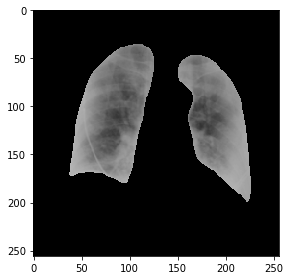

In [ ]:
image_m = image_resized*mask
imshow(image_m);

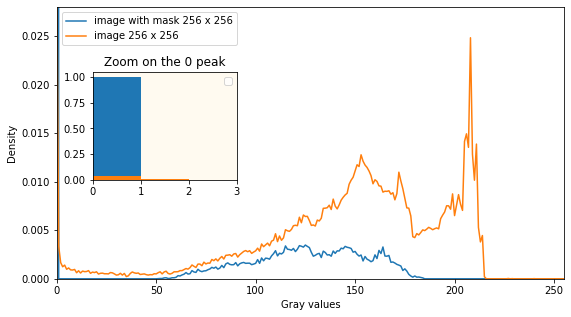

In [ ]:
hist_m = np.histogram(image_m, bins=256, range=(0,1), density=True)[0]/255
fig=plt.figure( figsize= (20, 5) )
plt.subplot(1,2,1)
plt.plot(hist_m, label='image with mask 256 x 256');
plt.plot(hist_r, label='image 256 x 256');
plt.xlabel('Gray values')
plt.ylabel('Density')
plt.legend();
plt.xlim([0,255]);
plt.ylim([0,0.028]);

plt.axes([.15, 0.4, .1, .3], facecolor='#FFFAF0');
plt.hist(image_m.ravel(), bins = range(0,256,1),density=True);
plt.hist(image.ravel(), bins = range(0,256,1),density =True);
plt.xlim([0,3]);
plt.gca().title.set_text('Zoom on the 0 peak');
plt.legend();

[EN] Much of the brightness is cut off, which is consistent with the observation of the image. The peak on the black increases due to the addition of the black mask.

[FR] Une grande partie de nuances claires est coupée, et le pic sur le noir augmente en raison de l'ajout du masque noir.

# 3. Images loading and processing 

In [ ]:
# sample the images by 1000 per category to save RAM. keep the idx for both images and masks
dict_sample_idx = dict()  # keep the sampled image index to get corresponding masks
for group in lst_group:
  num_imgs = len(os.listdir(dir_images[group]))  
  dict_sample_idx[group] = np.random.choice(range(1, num_imgs + 1), size=1000, replace=False) 

In [ ]:
# read and resize the sampled images
def get_fname(group, idx):
  return(f"{mapper_fname[group]}-{idx}.png")

dict_img_256 = dict()
for group in lst_group:
  print(group, 'image loading...')
  dict_img_256[group] = [resize(
      imread(os.path.join(dir_images[group], get_fname(group, idx)), as_gray=True),
      (256, 256), 
      anti_aliasing=True) 
  for idx in dict_sample_idx[group]]
for group in lst_group:
  print("number of images", group, len(dict_img_256[group]))

covid image loading...
normal image loading...
viral image loading...
opac image loading...
number of images covid 1000
number of images normal 1000
number of images viral 1000
number of images opac 1000


In [ ]:
# load the sampled masks
dict_mask = dict()
for group in lst_group:
  print(group, 'mask loading...')
  dict_mask[group] = [
      imread(os.path.join(dir_masks[group], get_fname(group, idx)), as_gray=True)
      for idx in dict_sample_idx[group]
      ]

for group in lst_group:
  print("number of masks", group, len(dict_mask[group]))

covid mask loading...
normal mask loading...
viral mask loading...
opac mask loading...
number of masks covid 1000
number of masks normal 1000
number of masks viral 1000
number of masks opac 1000


In [ ]:
# apply the masks to the images
dict_img_mask = dict()
for group in lst_group:
  print(group, 'masking...')
  dict_img_mask[group] = [image * mask for (image, mask) in zip(dict_img_256[group], dict_mask[group])]

covid masking...
normal masking...
viral masking...
opac masking...


In [ ]:
# normalize the image intensity to have same intensity while keeping the minmum = 0 
dict_img_norm = dict()
for group in lst_group:
  print(group, 'rescaling...')
  dict_img_norm[group] = [img_mask/img_mask.mean() * 0.2 for img_mask in dict_img_mask[group]]
  

covid rescaling...
normal rescaling...
viral rescaling...
opac rescaling...


''

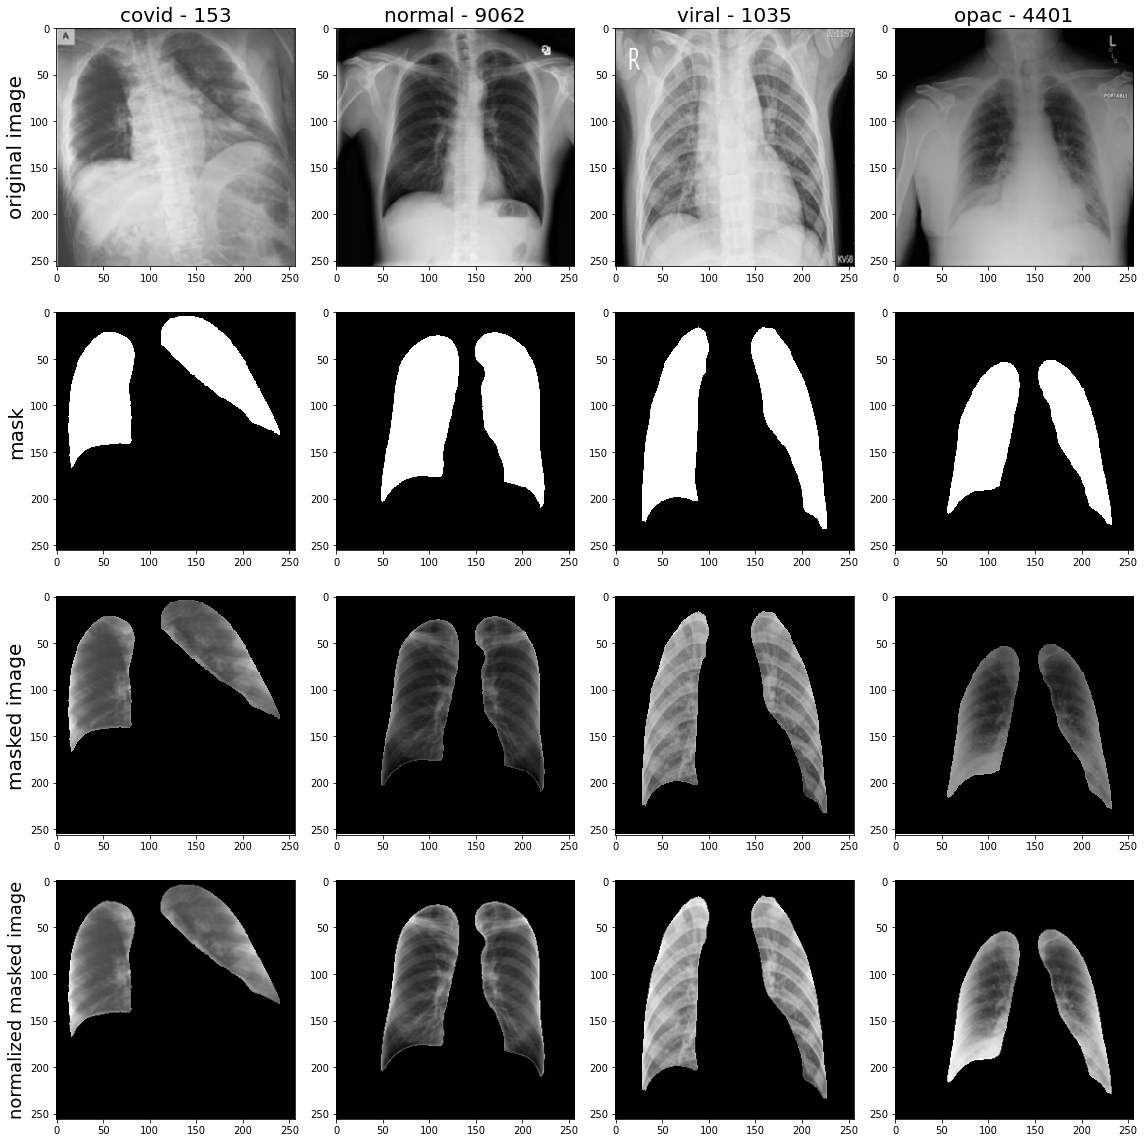

In [ ]:
# show example of original image, mask, masked image and normalized masked image by each category: 
plt.figure(figsize=(16, 16))
for i, group in enumerate(lst_group):
  r_idx = random.choice(range(len(dict_img_mask[group])))
  plt.subplot(4, 4, i + 1)
  imshow(dict_img_256[group][r_idx])
  if i == 0: 
    plt.ylabel("original image", rotation=90, fontsize=20)
  plt.title(f"{group} - {dict_sample_idx[group][r_idx]}", fontsize=20)
  plt.subplot(4, 4, i + 5)
  imshow(dict_mask[group][r_idx])
  if i == 0: 
    plt.ylabel("mask", rotation=90, fontsize=20)
  plt.subplot(4, 4, i + 9)
  imshow(dict_img_mask[group][r_idx])
  if i == 0: 
    plt.ylabel("masked image", rotation=90, fontsize=20)
  plt.subplot(4, 4, i + 13)
  plt.imshow(dict_img_norm[group][r_idx], cmap="gray")
  if i == 0: 
    plt.ylabel("normalized masked image", rotation=90, fontsize=18)
;

# 4.  Mean images by category

## Mean resized images

[EN] Averaging the images allows the spatial distribution of intensity to be studied. Differences in framing, for example, will result in a uniformity of flow over several areas. The comparison between categories will give indications of the characteristics of the images. If a category is more impacted by the anomalies identified above, the average image could be more affected.

[FR] La moyenne des images permet de tenir compte de la distribution spatiale de l'intensité. La différence des cadrages par exemple se traduira par une uniformisation de la couler sur plusieurs zones. La comparaison entre les catégories donnera des indications sur les caractéristiques des clichés. Si une catégorie est plus impactée par les anomalies identifiées plus haut, l'image moyenne pourrait le relever.

In [ ]:
# img_mean calculates the average of each pixel in an 256 x 256 image
# we could generalise the function by also passing the size N of the image, but we will only deal with this size for now
def img_mean(dict_img):
    img_mean =[ [0]*256 for i in range(256) ]
    for img in dict_img:
        img_mean = img_mean + img   
    return img_mean/len(dict_img)

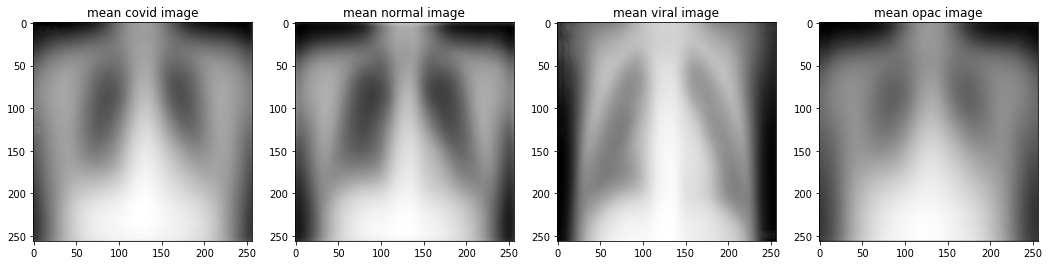

In [ ]:
fig=plt.figure(figsize= (18, 6))

plt.subplot(1,4,1)
plt.imshow(img_mean(dict_img_256['covid']),cmap='gray');
plt.gca().title.set_text('mean covid image')

plt.subplot(1,4,2)
plt.imshow(img_mean(dict_img_256['normal']), cmap='gray');
plt.gca().title.set_text('mean normal image');

plt.subplot(1,4,3)
plt.imshow(img_mean(dict_img_256['viral']),cmap='gray');
plt.gca().title.set_text('mean viral image');

plt.subplot(1,4,4)
plt.imshow(img_mean(dict_img_256['opac']),cmap='gray');
plt.gca().title.set_text('mean opac image');


[EN] We observe several potential biases. The framing of the image (more or less black background, raised arms, size of the lungs), the ribs or the brightness of the spine could be interpreted as a signature of a category. According to the experts we consulted, the edges of the lungs (the more or less grey area) on the other hand could be related to the pathology. To reduce the brightness bias, it may be useful to normalise the light intensity of the images. Masks can help to reduce framing bias.

[FR] Nous observons plusieurs biais potentiels. Le cadrage de l'image (fond plus ou moins noir, bras levés, taille des poumons), les côtes ou la luminosité de la colonne vertebrale pourraient être interprétés comme une signature d'une catégorie. Selon les experts que nous avons consultés, les bords des poumons (la zone plus ou moins grise) en revanche pourraient avoir un lien avec la pathologie. Pour réduire le biais lié à la luminosité, il pourrait être utile de normaliser l'intensité lumineuse des images.
Les masques pourrainet aider à réduire les biais de cadrage.

## Mean masked images

### Method 1: average the masked images

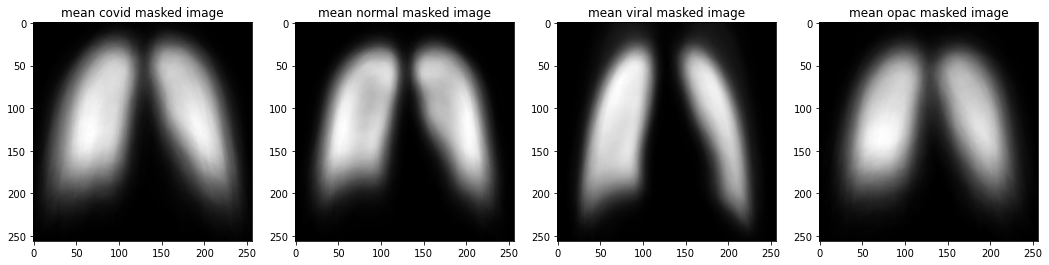

In [ ]:
fig=plt.figure(figsize= (18, 6))

plt.subplot(1,4,1)
plt.imshow(img_mean(dict_img_mask['covid']),cmap='gray');
plt.gca().title.set_text('mean covid masked image')

plt.subplot(1,4,2)
plt.imshow(img_mean(dict_img_mask['normal']), cmap='gray');
plt.gca().title.set_text('mean normal masked image');

plt.subplot(1,4,3)
plt.imshow(img_mean(dict_img_mask['viral']),cmap='gray');
plt.gca().title.set_text('mean viral masked image');

plt.subplot(1,4,4)
plt.imshow(img_mean(dict_img_mask['opac']),cmap='gray');
plt.gca().title.set_text('mean opac masked image');

[EN] Some of the bias has been removed. The shape of the area between the lungs and the brightness of some areas could still represent biases.

[FR] Une partie des biais a été retirée. La forme de la zone entre les poumons et la luminosité de certaines zones pourraient représenter encore des biais.

### Method 2: Average the mask, then apply the mean masks to the mean images

[EN] The blurred contours of the lungs are due, among other things, to the different positions of the masks. We therefore study the average masks and apply them to the average images.

[FR] Les contours flous des poumons sont dûs entre autres aux différentes positions des masques. Nous étudions donc les masques moyens et les appliquons aux images moyennes.

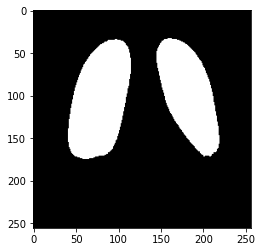

In [ ]:
# mean masks
def mask_mean (dict_mask):
    mask_mean =[ [0]*256 for i in range(256) ]
    for mask in dict_mask:
        mask_mean = mask_mean + mask   
    return np.where(mask_mean/len(dict_mask) < 0.5, 0, 1) # threshold on 0.5
# check the function
plt.figure(figsize= (4, 4))
plt.imshow(mask_mean(dict_mask['covid']),cmap='gray');

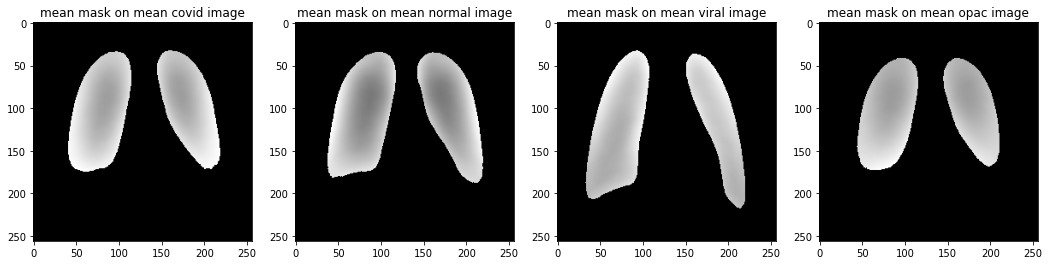

In [ ]:
# visualization
fig=plt.figure(figsize= (18, 6))

plt.subplot(1,4,1)
plt.imshow(img_mean(dict_img_256['covid'])*mask_mean(dict_mask['covid']),cmap='gray');
plt.gca().title.set_text('mean mask on mean covid image')

plt.subplot(1,4,2)
plt.imshow(img_mean(dict_img_256['normal'])*mask_mean(dict_mask['normal']), cmap='gray');
plt.gca().title.set_text('mean mask on mean normal image');

plt.subplot(1,4,3)
plt.imshow(img_mean(dict_img_256['viral'])*mask_mean(dict_mask['viral']),cmap='gray');
plt.gca().title.set_text('mean mask on mean viral image');

plt.subplot(1,4,4)
plt.imshow(img_mean(dict_img_256['opac'])*mask_mean(dict_mask['opac']),cmap='gray');
plt.gca().title.set_text('mean mask on mean opac image');

[EN] By applying the average mask to the average image, the shape of the lungs is more clearly differentiated. The healthy lungs are slightly darker than the diseased lungs, which could be a clinical reality, as inflammation results in lighter areas. Hence the importance of standardising light intensity.

[FR] En appliquant le masque moyen sur l'image moyenne, la forme des poumons est différenciée de façon plus nette. Les poumons sains sont un peu plus foncés que les poumons malades, ce qui pourraient correspondre à une réalité clinique, car une inflamation se traduit par des zones plus claires. D'où l'importance d'une normalization de l'intensité lumineuse.

# 5.  Statistics of mean intensity of each image


[EN] Objective of the analysis:

- Are the differences of intensity distribution among the groups due to chance or if there's bias?

- Does application of the mask and intensity normalisation reduce the bias?

[FR] Finalités des analyses:

- Y a-t-il des différences entre les distributions d'intensité des quatre groupes ou cela est dû au hasard ou aux biais ?

- L'application des masques et la normalisation de l'intensité réduisent-elles les biais ?


[EN] Firstly, Let's make some naive and intuitive analysis. 
e.g. get the mean intensity of all the pixels within an image, and compare the distribution of the mean intensities among the three groups. 
Then we replace mean by median and standard deviation. 

[FR] Nous commençons par des analyses simples et intuitives. Notamment la moyenne de l'intensité sur tous les pixels de l'image poru chaque groupe, puis la médiane et l'écart type. 

In [ ]:
# resized images
dict_mean = dict(zip(lst_group, [[img.mean() for img in dict_img_256[group]] for group in lst_group]))
dict_median = dict(zip(lst_group, [[np.median(img) for img in dict_img_256[group]] for group in lst_group]))
dict_std = dict(zip(lst_group, [[img.std() for img in dict_img_256[group]] for group in lst_group]))

df_mean = pd.DataFrame.from_dict(dict_mean,  orient='index').transpose()
df_median = pd.DataFrame.from_dict(dict_median,  orient='index').transpose()
df_std = pd.DataFrame.from_dict(dict_std,  orient='index').transpose()

In [ ]:
# masked resized images
dict_mean_mask = dict(zip(lst_group, [[img.mean() for img in dict_img_mask[group]] for group in lst_group]))
dict_median_mask = dict(zip(lst_group, [[np.median(img) for img in dict_img_mask[group]] for group in lst_group]))
dict_std_mask = dict(zip(lst_group, [[img.std() for img in dict_img_mask[group]] for group in lst_group]))

df_mean_mask = pd.DataFrame.from_dict(dict_mean_mask,  orient='index').transpose()
df_median_mask = pd.DataFrame.from_dict(dict_median_mask,  orient='index').transpose()
df_std_mask = pd.DataFrame.from_dict(dict_std_mask,  orient='index').transpose()

In [ ]:
# normalized masked resized images
dict_mean_normalize = dict(zip(lst_group, [[img.mean() for img in dict_img_norm[group]] for group in lst_group]))
dict_median_normalize = dict(zip(lst_group, [[np.median(img) for img in dict_img_norm[group]] for group in lst_group]))
dict_std_normalize = dict(zip(lst_group, [[img.std() for img in dict_img_norm[group]] for group in lst_group]))

df_mean_normalize = pd.DataFrame.from_dict(dict_mean_normalize,  orient='index').transpose()
df_median_normalize = pd.DataFrame.from_dict(dict_median_normalize,  orient='index').transpose()
df_std_normalize = pd.DataFrame.from_dict(dict_std_normalize,  orient='index').transpose()

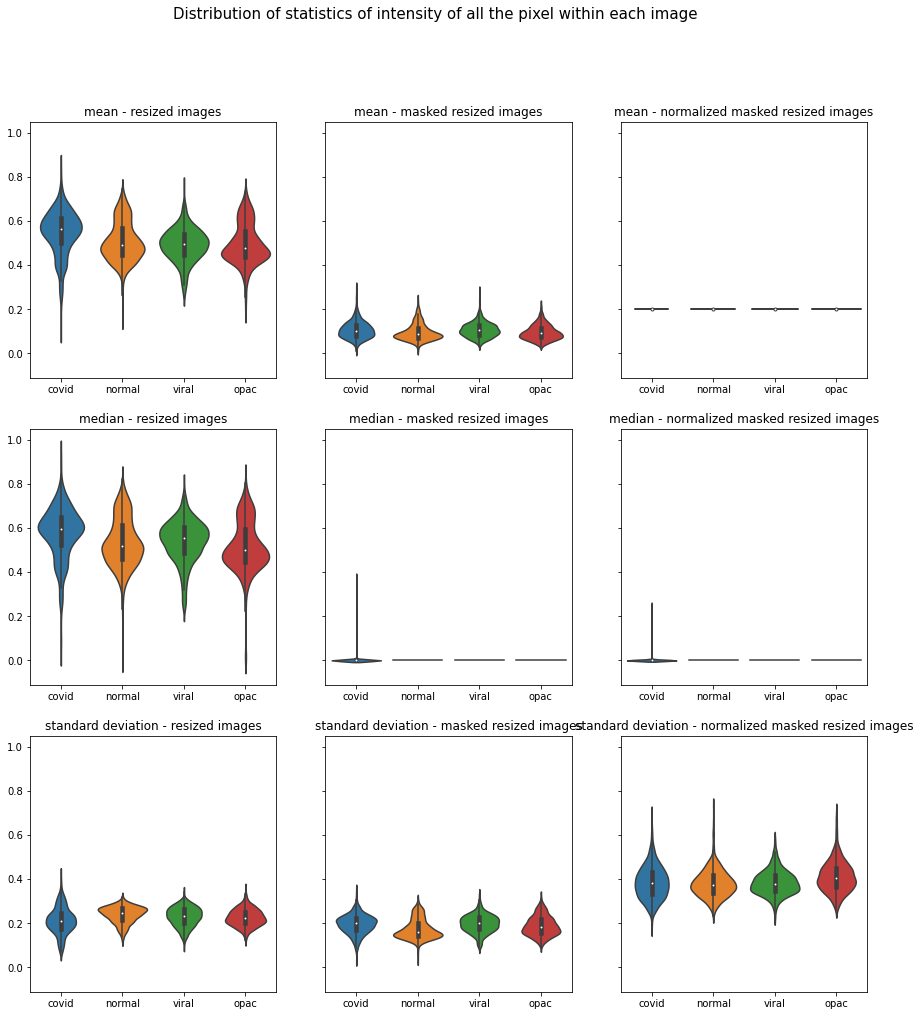

In [ ]:
# data viz
fig, axes = plt.subplots(3, 3, figsize=(15, 16), sharey=True)
sns.violinplot(data=df_mean, ax=axes[0, 0]).set(title="mean - resized images")
sns.violinplot(data=df_median, ax=axes[1, 0]).set(title="median - resized images")
sns.violinplot(data=df_std, ax=axes[2, 0]).set(title="standard deviation - resized images")

sns.violinplot(data=df_mean_mask, ax=axes[0, 1]).set(title="mean - masked resized images")
sns.violinplot(data=df_median_mask, ax=axes[1, 1]).set(title="median - masked resized images")
sns.violinplot(data=df_std_mask, ax=axes[2, 1]).set(title="standard deviation - masked resized images")

sns.violinplot(data=df_mean_normalize, ax=axes[0, 2]).set(title="mean - normalized masked resized images")
sns.violinplot(data=df_median_normalize, ax=axes[1, 2]).set(title="median - normalized masked resized images")
sns.violinplot(data=df_std_normalize, ax=axes[2, 2]).set(title="standard deviation - normalized masked resized images")

plt.suptitle("Distribution of statistics of intensity of all the pixel within each image", fontsize=15);

[EN] Conclusion:


*   Before application of the masks: The distribution of the statistics of 
intensity of the images are slightly different among the four categories, showing the existence of the bias.

*   After application of the masks: The difference among the groups decreased, showing the benefit of applying the mask for reduce the bias. However, there's still visible differences among the different categories, indicating that the bias is not completely removed. 

*   After rescaling: The mean of the mean intensity are ajusted to the same value. The distribution of standard deviation of mean intensity seems to have less difference among the categories. 

[FR] Conclusion :


* Avant l'application des masques : Les distributions de la moyenne de la médiane et de l'écart type de l'intensité des images sont légèrement différentes entre les quatre catégories, ce qui montre le biais entre ces catégories. 
 
* Après l'application des masques : La différence entre les catégories a diminué, montrant l'intérêt de l'application du masque pour réduire le biais. Cependant, il existe encore des différences visibles entre les différentes catégories, ce qui indique que le biais n'est pas complètement éliminé. 

* Après normalisation de l'intensité : La moyenne de l'intensité moyenne est ajustée à la même valeur. La distribution de l'écart type de l'intensité moyenne semble avoir moins de différence entre les catégories.




# 6.  Intensity distribution analysis

#### Intensity distribution on resized raw images
[EN] Does the category of lung disease have a statistical effect on light intensity?

[FR] La catégorie de la pathologie pulmonaire a-t-elle un effet statistique sur l'intensité lumineuse ?

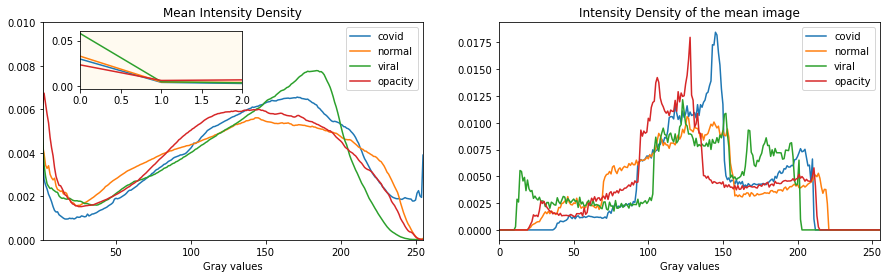

In [ ]:
# finally I use np.histogram[0] to make sure I always have an array of size 256, which is important for the average calculation
# we have to divide by 255 in order to have the integral = 1 (normalization)

def density_mean(dict_img):
    dens_mean=[0]*256
    for img in dict_img:
        dens_mean = dens_mean + np.histogram(img, bins=256, range=(0,1), density=True)[0]
    return dens_mean/(len(dict_img)*255)

fig=plt.figure( figsize= (15, 4) )

plt.subplot(1,2,1)
plt.plot(density_mean(dict_img_256['covid']), label='covid');
plt.plot(density_mean(dict_img_256['normal']), label='normal');
plt.plot(density_mean(dict_img_256['viral']), label='viral');
plt.plot(density_mean(dict_img_256['opac']), label='opacity');
plt.title('Mean Intensity Density')
plt.xlabel('Gray values')
plt.xlim([1,255]);
plt.ylim([0,0.010]);
plt.legend();

plt.axes([.16, 0.65, .15, .2], facecolor='#FFFAF0');
plt.plot(density_mean(dict_img_256['covid']));
plt.plot(density_mean(dict_img_256['normal']));
plt.plot(density_mean(dict_img_256['viral']));
plt.plot(density_mean(dict_img_256['opac']));
plt.xlim([0,2]);
#plt.ylim([0,0.02]);
#plt.gca().title.set_text('Zoom on the 0 peak');

plt.subplot(1,2,2)
plt.plot(np.histogram(img_mean(dict_img_256['covid']),bins=256, range=(0,1), density=True)[0]/255, label='covid');
plt.plot(np.histogram(img_mean(dict_img_256['normal']),bins=256, range=(0,1), density=True)[0]/255 , label='normal');
plt.plot(np.histogram(img_mean(dict_img_256['viral']),bins=256, range=(0,1), density=True)[0]/255 , label='viral');
plt.plot(np.histogram(img_mean(dict_img_256['opac']),bins=256, range=(0,1), density=True)[0]/255 , label='opacity');
plt.title('Intensity Density of the mean image')
plt.xlabel('Gray values')
plt.xlim([0,255]);
#plt.ylim([0,0.0]);
plt.legend();


[EN] The four categories have slightly different average densities. While the density average ignores the spatial distribution of light intensity, the mean image takes this distribution into account. In particular, the peak on black (zero value) shifts and density is refocused on intermediate shades. The average intensity is an indicator less influenced by framing bias.

[FR] Les quatre catégories présentent des densités moyennes légèrement différentes. Alors que la moyenne des densités fait abstraction de la distribution spatiale de l'intensité lumineuse, la moyenne des images prend en compte cette distribution. Le pic sur le noir notamment se déplace et la densité se recentre sur des nuances intermédiaires. L'intensité moyenne est un indicateur moins influencé par les biais de cadrage.

## Intensity distribution of masked images


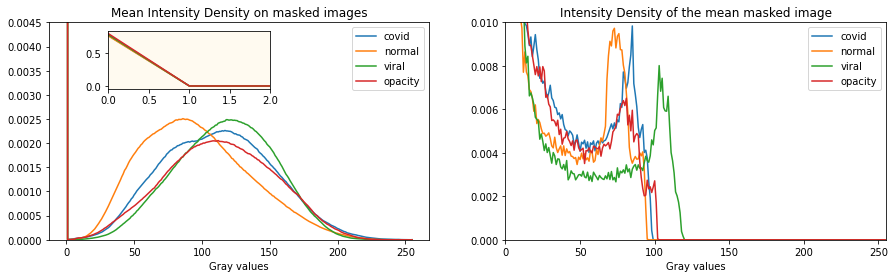

In [ ]:
fig=plt.figure( figsize= (15, 4) )

plt.subplot(1,2,1)
plt.plot(density_mean(dict_img_mask['covid']), label='covid');
plt.plot(density_mean(dict_img_mask['normal']), label='normal');
plt.plot(density_mean(dict_img_mask['viral']), label='viral');
plt.plot(density_mean(dict_img_mask['opac']), label='opacity');
plt.title('Mean Intensity Density on masked images')
plt.xlabel('Gray values')
#plt.xlim([1,255]);
plt.ylim([0,0.0045]);
plt.legend();

plt.axes([.18, 0.65, .15, .2], facecolor='#FFFAF0');
plt.plot(density_mean(dict_img_mask['covid']));
plt.plot(density_mean(dict_img_mask['normal']));
plt.plot(density_mean(dict_img_mask['viral']));
plt.plot(density_mean(dict_img_mask['opac']));
plt.xlim([0,2]);
#plt.ylim([0,1]);
#plt.gca().title.set_text('Zoom on the 0 peak');

plt.subplot(1,2,2)
plt.plot(np.histogram(img_mean(dict_img_mask['covid']),bins=256, range=(0,1), density=True)[0]/255, label='covid');
plt.plot(np.histogram(img_mean(dict_img_mask['normal']),bins=256, range=(0,1), density=True)[0]/255 , label='normal');
plt.plot(np.histogram(img_mean(dict_img_mask['viral']),bins=256, range=(0,1), density=True)[0]/255 , label='viral');
plt.plot(np.histogram(img_mean(dict_img_mask['opac']),bins=256, range=(0,1), density=True)[0]/255 , label='opacity');
plt.title('Intensity Density of the mean masked image')
plt.xlabel('Gray values')
plt.xlim([0,255]);
plt.ylim([0,0.01]);
plt.legend();

[EN] The addition of the mask seems to have removed some bias and the four average densities seem to be more differentiated. The density of the average masked image (right-hand image), on the other hand, does not seem to be a good working tool. 
We will complete this analysis by studying the average means, medians and standard deviations.

[FR] L'ajout du masque semble avoir éliminé des biais et les quatre densités moyennes semblent se différencier davantage. La densité de l'image masquée moyenne (image de droite) en revanche ne semble pas un bon outil de travail. 
Nous allons compléter cette analyse par l'étude des moyennes, médianes et écarts type moyens.

## Mean intensity distribution of masked normalized images



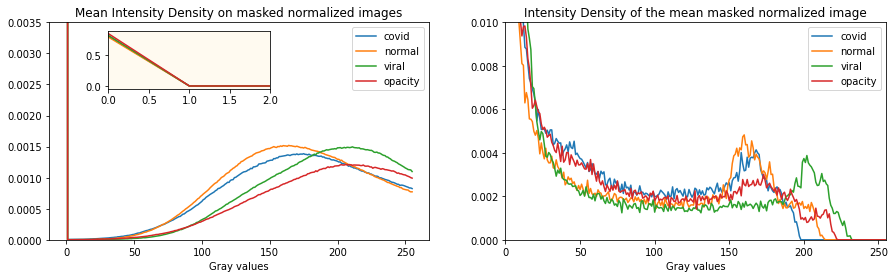

In [ ]:
fig=plt.figure( figsize= (15, 4) )

plt.subplot(1,2,1)
plt.plot(density_mean(dict_img_norm['covid']), label='covid');
plt.plot(density_mean(dict_img_norm['normal']), label='normal');
plt.plot(density_mean(dict_img_norm['viral']), label='viral');
plt.plot(density_mean(dict_img_norm['opac']), label='opacity');
plt.title('Mean Intensity Density on masked normalized images')
plt.xlabel('Gray values')
plt.ylim([0,0.0035])
plt.legend()

plt.axes([.18, 0.65, .15, .2], facecolor='#FFFAF0');
plt.plot(density_mean(dict_img_norm['covid']));
plt.plot(density_mean(dict_img_norm['normal']));
plt.plot(density_mean(dict_img_norm['viral']));
plt.plot(density_mean(dict_img_norm['opac']));
plt.xlim([0,2])
#plt.ylim([0,1]);
#plt.gca().title.set_text('Zoom on the 0 peak');

plt.subplot(1,2,2)
plt.plot(np.histogram(img_mean(dict_img_norm['covid']),bins=256, range=(0,1), density=True)[0]/255, label='covid');
plt.plot(np.histogram(img_mean(dict_img_norm['normal']),bins=256, range=(0,1), density=True)[0]/255 , label='normal');
plt.plot(np.histogram(img_mean(dict_img_norm['viral']),bins=256, range=(0,1), density=True)[0]/255 , label='viral');
plt.plot(np.histogram(img_mean(dict_img_norm['opac']),bins=256, range=(0,1), density=True)[0]/255 , label='opacity');
plt.title('Intensity Density of the mean masked normalized image')
plt.xlabel('Gray values')
plt.xlim([0,255])
plt.ylim([0,0.01])
plt.legend();


# 7.  ANOVA
[EN] In the case of the median variable, we observe a significant change in behaviour when we apply a mask. The covid case in particular seems to differ from the other three categories.
Can we reject the hypothesis that lung pathology ('covid', 'normal', 'viral', 'opac') has no statistical effect on this variable? 
We performed an ANOVA test on the median and then on the mean and standard deviation of the light intensity of the images.

[FR] Dans le cas de la médiane, nous observons un changement de comportement important lorsque nous appliquons un mask. Le cas covid en particulier semble se distinguer des trois autres catégories. 
Pouvons-nous rejeter l'hypothèse que la pathologie pulmonaire ('covid', 'normal','viral','opac') n'a pas d'effet statistique sur cette variable ? 
Nous avons réalisé un test ANOVA sur la médiane puis sur la moyenne et l' écart type de l'intensité lumineuse des images.

In [ ]:
# df without mask
df_stats = pd.DataFrame(columns=['mean', 'std', 'median','category'])
for group in lst_group:
  df_group = pd.DataFrame({'mean':[img.mean() for img in dict_img_256[group]],
              'std':[img.std() for img in dict_img_256[group]],
              'median':[np.median(img) for img in dict_img_256[group]],
              'category': [group] * len(dict_img_256[group])
              })
  df_stats = pd.concat([df_stats, df_group], axis=0)
# df with mask
df_stats_mask = pd.DataFrame(columns=['mean', 'std','median', 'category'])
for group in lst_group:
  df_group = pd.DataFrame({'mean':[img.mean() for img in dict_img_mask[group]],
              'std':[img.std() for img in dict_img_mask[group]],
              'median':[np.median(img) for img in dict_img_mask[group]],
              'category': [group] * len(dict_img_mask[group])
              })
  df_stats_mask = pd.concat([df_stats_mask, df_group], axis=0)
# df with mask + normalized
df_stats_normalize = pd.DataFrame(columns=['mean', 'std','median', 'category'])
for group in lst_group:
  df_group = pd.DataFrame({'mean':[img.mean() for img in dict_img_norm[group]],
              'std':[img.std() for img in dict_img_norm[group]],
              'median':[np.median(img) for img in dict_img_norm[group]],
              'category': [group] * len(dict_img_norm[group])
              })
  df_stats_normalize = pd.concat([df_stats_normalize, df_group], axis=0)
df_stats_normalize.head()

,mean,std,median,category
0,0.2,0.448901,0.0,covid
1,0.2,0.352754,0.0,covid
2,0.2,0.366493,0.0,covid
3,0.2,0.423248,0.0,covid
4,0.2,0.382649,0.0,covid


In [ ]:
# ANOVA test on average median of images
import statsmodels.api
df_anova_median = pd.DataFrame(columns=['f_score', 'p_value'])
for process_status, df in zip(['original', 'masked', 'normalized'], [df_stats, df_stats_mask, df_stats_normalize]):
  result = statsmodels.formula.api.ols('median ~ category', data = df).fit()
  anova = statsmodels.api.stats.anova_lm(result)
  new_row = pd.DataFrame([anova['F'][0], anova['PR(>F)'][0]]).transpose()
  new_row.columns = df_anova_median.columns
  new_row.index = [process_status]
  df_anova_median = pd.concat([df_anova_median, new_row])
df_anova_median

,f_score,p_value
original,58.045819,1.006804e-36
masked,2.001173,1.116218e-01
normalized,2.000319,1.117463e-01


[EN] While in the unmasked images we can reject the hypothesis of no statistical effect of lung pathology on the median, in the case of the masked images the hypothesis cannot be rejected. The pathology would therefore have no effect on the median.

[FR] Alors que sur les images sans masque, nous pouvons rejeter l'hythothèse d'une absence d'effets statistiques de la pathologie pulmonaire sur la médiane, dans le cas des images avec masque, l'hypothèse ne peut pas être rejetée. La pathologie donc n'aurait pas d'effets sur la médiane.

In [ ]:
# ANOVA test on average mean values of images
import statsmodels.api
df_anova_mean = pd.DataFrame(columns=['f_score', 'p_value'])
for process_status, df in zip(['original', 'masked', 'normalized'], [df_stats, df_stats_mask, df_stats_normalize]):
  result = statsmodels.formula.api.ols('mean ~ category', data = df).fit()
  anova = statsmodels.api.stats.anova_lm(result)
  new_row = pd.DataFrame([anova['F'][0], anova['PR(>F)'][0]]).transpose()
  new_row.columns = df_anova_mean.columns
  new_row.index = [process_status]
  df_anova_mean = pd.concat([df_anova_mean, new_row])
df_anova_mean

,f_score,p_value
original,75.198371,2.595237e-47
masked,39.020145,7.576621e-25
normalized,601.101498,1.877449e-322


Actually there should be no difference between mean values of the normalized images because their mean are all normalized to the same value. The extreme small p-value for mean of the normalized images may due to python's handling divide by zero problem. 

In [ ]:
# ANOVA test on average standard deviation of images
import statsmodels.api
df_anova_std = pd.DataFrame(columns=['f_score', 'p_value'])
for process_status, df in zip(['original', 'masked', 'normalized'], [df_stats, df_stats_mask, df_stats_normalize]):
  result = statsmodels.formula.api.ols('std ~ category', data = df).fit()
  anova = statsmodels.api.stats.anova_lm(result)
  new_row = pd.DataFrame([anova['F'][0], anova['PR(>F)'][0]]).transpose()
  new_row.columns = df_anova_std.columns
  new_row.index = [process_status]
  df_anova_std = pd.concat([df_anova_std, new_row])
df_anova_std

,f_score,p_value
original,60.037959,5.850586e-38
masked,78.656092,1.967000e-49
normalized,41.876533,1.225141e-26


[EN] In the case of the standard deviation, we can reject the hypothesis that lung pathology has no statistically significant effect on these variables. 
[FR] Dans le cas de la moyenne et de l'écart type, nous pouvons rejeter l'hypothèse que la pathologie pulmonaire n'a pas d'effet statistique significatif sur ces variables.

[EN] Although for mean and standard deviation we always conclude that at least one group is different from the other, we can observe that the f_score is reducing and the p-value is increading, showing that application of the mask and normalization of the intensity tends to reduce the difference among the groups.

[FR] Bien que pour la moyenne et l'écart-type, nous concluons toujours qu'au moins un groupe est différent de l'autre, nous pouvons observer que le f_score diminue et que la valeur p augmente, montrant que l'application du masque et la normalisation de l'intensité tend à réduire la différence entre les groupes.

# 8.  PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

num_img = 200   # number of images per category used for PCA. 

# before mask

X1 = np.zeros(shape=(4 * num_img, 256*256))
lst_label = list()
ind_img = 0
for group in lst_group:
  print(group)
  X1[ind_img: ind_img + num_img] = [img.reshape(-1) for img in dict_img_256[group][:num_img]]
  lst_label.extend([group for i in range(num_img)])
  ind_img += num_img

y = np.array(lst_label)

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

pca1 = PCA(n_components=2)
X1_r = pca1.fit(X1).transform(X1)

# Percentage of variance explained for each components
print(
    "before mask: explained variance ratio (first two components): %s"
    % str(pca1.explained_variance_ratio_)
)

covid
normal
viral
opac
before mask: explained variance ratio (first two components): [0.25840507 0.17301461]


In [ ]:
# after mask
X2 = np.zeros(shape=(4 * num_img, 256*256))
ind_img = 0
for group in lst_group:
  X2[ind_img: ind_img + num_img] = [img.reshape(-1) for img in dict_img_mask[group][:num_img]]
  ind_img += num_img

scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

pca2 = PCA(n_components=2)
X2_r = pca2.fit(X2).transform(X2)

# Percentage of variance explained for each components
print(
    "after mask: explained variance ratio (first two components): %s"
    % str(pca2.explained_variance_ratio_)
)

after mask: explained variance ratio (first two components): [0.11321491 0.10322859]


In [ ]:
# after mask and normalization
X3 = np.zeros(shape=(4 * num_img, 256*256))
ind_img = 0
for group in lst_group:
  X3[ind_img: ind_img + num_img] = [img.reshape(-1) for img in dict_img_norm[group][:num_img]]
  ind_img += num_img

scaler = MinMaxScaler()
X3 = scaler.fit_transform(X3)

pca3 = PCA(n_components=2)
X3_r = pca3.fit(X3).transform(X3)

# Percentage of variance explained for each components
print(
    "after mask: explained variance ratio (first two components): %s"
    % str(pca3.explained_variance_ratio_)
)

after mask: explained variance ratio (first two components): [0.10565319 0.07933732]


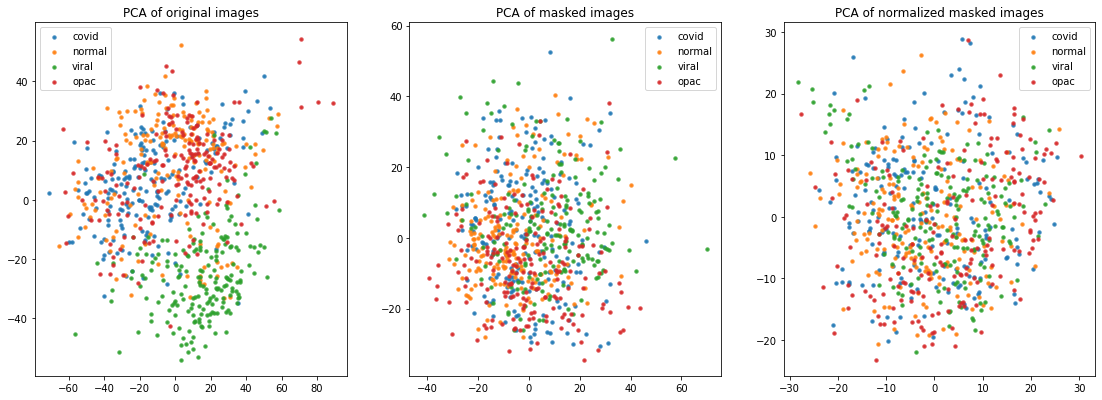

In [ ]:
# viz
plt.rcParams["figure.figsize"] = (19, 6.5)

plt.subplot(131)
lw = 2
for i, group in enumerate(lst_group):
    plt.scatter(
        X1_r[y == group, 0], X1_r[y == group, 1], alpha=0.8, lw=lw, 
        label=group, s=6
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of original images")

plt.subplot(132)
lw = 2
for i, group in enumerate(lst_group):
    plt.scatter(
        X2_r[y == group, 0], X2_r[y == group, 1], alpha=0.8, lw=lw, 
        label=group, s=6
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of masked images")

plt.subplot(133)
lw = 2
for i, group in enumerate(lst_group):
    plt.scatter(
        X3_r[y == group, 0], X3_r[y == group, 1], alpha=0.8, lw=lw, 
        label=group, s=6
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of normalized masked images");

Conclusion: 


*   Before application of the mask, the category 'viral' form a clear cluster apart from the other categories. 
*   After application of the mask, all the categories are superimposed together, showing that the bias between the categories are reduced thanks to the masks. 
*   After rescaling, the points are even more homogeneously distributed in the space. Suggesting that the bias is futher reduced. 
*   The decreasing explained variance ratio of the first two principal components also proves that the variance among the categories is reducing after the mask and normalization. 



[FR] Conclusion : 

* Avant d'appliquer le masque, la catégorie "virale" forme un groupe distinct des autres catégories. 
* Après l'application du masque, toutes les catégories sont superposées, ce qui montre que les biais entre les catégories sont réduits grâce aux masques. 
* Après la remise à l'échelle de l'intensité, les points sont répartis de manière encore plus homogène dans l'espace. Ce qui suggère que le biais est réduit davantage.
* Le ratio de variance expliquée décroissant des deux premières composantes principales prouve également que la variance entre les catégories diminue après le masque et la normalisation.


# Preprocessing Pipeline

[EN] According to the analysis above, we conclude that there's bias between the different categories of images and the application of mask followed by normalization of the images helps to reduce the bias. We thus designed the preprocessing pipeline as below.

[FR] D'après l'analyse ci-dessus, nous concluons qu'il existe un biais entre les différentes catégories d'images et que l'application d'un masque suivie d'une normalisation des images permet de réduire le biais. Nous avons donc conçu le pipeline de prétraitement comme ci-dessous.

In [ ]:
def get_fname(group, idx):
  return(f"{mapper_fname[group]}-{idx}.png")


def normalize_intensity(img, mean=.2, min=0):
  return(img/img.mean() * (mean - min) + min)


def pipeline(paths_image, paths_mask=None, output_size=(256, 256), use_mask=True, 
             normalize_intensity=True, mean_intensity=0.2, min_intensity=0):
  """
  Parameters
  ------------
  paths_image: list, array or series: Paths to the radio images. 
  paths_mask: list, array or series: Paths to the corresponding masks.
  output_size: tuple: the destinated size of each image. If none, the image will keep its original size. 
  use_mask: bool: whether apply the masks to the radio images.
  normalize_intensity: bool: whether normalize the intensity of each image to a given mean and minimum value.
  mean_intensity: float: desired mean intensity of the pixels in an image
  min_intensity: float: desired minimum intensity of the pixels in an image

  Return:
  ------------
  ndarray of shape (output_size[0], output_size[1], len(paths_image))

  """
  if output_size == (299, 299):
    images = np.array([imread(path, as_gray=True) for path in paths_image])
  else: 
    images = np.array([resize(imread(path, as_gray=True), output_size, anti_aliasing=True) for path in paths_image])

  if use_mask:
    if output_size == (256, 256):
      masks = np.array([imread(path, as_gray=True) for path in paths_mask])
    else:
      masks = np.array([resize(imread(path, as_gray=True), output_size, anti_aliasing=True) for path in paths_mask])
    images = images * masks
    
  if normalize_intensity:
    images = normalize_intensity(images, mean=mean_intensity, min=min_intensity)

  return images 
